# Netflix Data Analysis - Complete Guide

This notebook analyzes Netflix viewing data to understand:
1. **Outage Period Analysis** - Finding periods with low or zero viewing hours
2. **Relationship Between Key Columns and Ratings** - Understanding what affects rankings

---

## Step 1: Import Required Libraries

**What we're doing:** Loading Python tools that help us analyze and visualize data

**Why:** These libraries provide functions for data manipulation (pandas), numerical operations (numpy), and creating charts (matplotlib, seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Setting style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Step 2: Load the Data

**What we're doing:** Reading the Excel file into a pandas DataFrame

**Why:** A DataFrame is like a table in Python that makes it easy to work with data

In [2]:
# Load the data
df = pd.read_excel('Data File.xlsx')

# Display basic information
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nColumn names:")
print(df.columns.tolist())

Dataset has 520 rows and 8 columns

Column names:
['date_added', 'week', 'category', 'show_title', 'season_title', 'weekly_rank', 'cumulative_weeks_in_top_10', 'weekly_hours_viewed']


## Step 3: Explore the Data

**What we're doing:** Looking at the first few rows and getting summary statistics

**Why:** This helps us understand what the data looks like and if there are any issues

In [3]:
# Show first 5 rows
print("First 5 rows of data:")
display(df.head())

# Data types
print("\nData types:")
print(df.dtypes)

First 5 rows of data:


,date_added,week,category,show_title,season_title,weekly_rank,cumulative_weeks_in_top_10,weekly_hours_viewed
0,2022-05-10,2022-05-08,Films (English),365 Days,NaN,10,2,6290000
1,2022-04-26,2022-04-24,TV (Non-English),Heirs to the Land,Heirs to the Land: Season 1,5,2,18840000
2,2022-05-03,2022-05-01,Films (English),365 Days,NaN,4,1,10040000
3,2022-05-03,2022-05-01,Films (English),365 Days: This Day,NaN,1,1,77980000
4,2022-04-12,2022-04-10,Films (Non-English),Furioza,NaN,1,1,23960000



Data types:
date_added                    datetime64[ns]
week                          datetime64[ns]
category                              object
show_title                            object
season_title                          object
weekly_rank                            int64
cumulative_weeks_in_top_10             int64
weekly_hours_viewed                    int64
dtype: object


In [4]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Summary Statistics:


,date_added,week,weekly_rank,cumulative_weeks_in_top_10,weekly_hours_viewed
count,520,520,520.000000,520.000000,5.200000e+02
mean,2022-05-17 00:00:00,2022-05-15 00:00:00,5.500000,3.538462,1.707833e+07
min,2022-04-05 00:00:00,2022-04-03 00:00:00,1.000000,1.000000,0.000000e+00
25%,2022-04-26 00:00:00,2022-04-24 00:00:00,3.000000,1.000000,5.210000e+06
50%,2022-05-17 00:00:00,2022-05-15 00:00:00,5.500000,2.000000,1.039500e+07
75%,2022-06-07 00:00:00,2022-06-05 00:00:00,8.000000,4.000000,1.758750e+07
max,2022-06-28 00:00:00,2022-06-26 00:00:00,10.000000,28.000000,3.350100e+08
std,NaN,NaN,2.875047,4.199557,2.788357e+07



Missing Values:
date_added                      0
week                            0
category                        0
show_title                      0
season_title                  271
weekly_rank                     0
cumulative_weeks_in_top_10      0
weekly_hours_viewed             0
dtype: int64


## Step 4: Data Cleaning and Preparation

**What we're doing:** Fixing any data issues and creating new useful columns

**Why:** Clean data gives us accurate results. We're also creating features that help with analysis

In [5]:
# Ensure date columns are in datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
df['week'] = pd.to_datetime(df['week'])

# Convert hours viewed to millions for easier reading
df['hours_viewed_millions'] = df['weekly_hours_viewed'] / 1_000_000

# Extract additional date features
df['week_number'] = df['week'].dt.isocalendar().week
df['month'] = df['week'].dt.month
df['day_of_week'] = df['week'].dt.day_name()

print("Data cleaned and new features created!")
print(f"\nNew columns added: hours_viewed_millions, week_number, month, day_of_week")

Data cleaned and new features created!

New columns added: hours_viewed_millions, week_number, month, day_of_week


---
# Part 1: Netflix - Dealing with Outage Period

**Goal:** Identify periods where Netflix had unusually low viewing hours (potential outages or data issues)

**Approach:** We'll look for weeks with zero or very low viewing hours across all shows

## Step 5: Identify Low Viewing Periods

**What we're doing:** Finding shows/weeks with zero or very low viewing hours

**Why:** These could indicate:
- Service outages
- Data collection issues
- Shows being removed from platform

In [6]:
# Find entries with zero viewing hours
zero_views = df[df['weekly_hours_viewed'] == 0]

print(f"Found {len(zero_views)} entries with ZERO viewing hours")
print(f"\nThese represent {len(zero_views)/len(df)*100:.2f}% of all data")

if len(zero_views) > 0:
    print("\nShows with zero viewing hours:")
    display(zero_views[['week', 'show_title', 'category', 'weekly_rank', 'weekly_hours_viewed']].head(10))

Found 40 entries with ZERO viewing hours

These represent 7.69% of all data

Shows with zero viewing hours:


,week,show_title,category,weekly_rank,weekly_hours_viewed
8,2022-05-22,365 Days: This Day,Films (English),9,0
22,2022-05-22,A Perfect Pairing,Films (English),2,0
23,2022-05-22,My Liberation Notes,TV (Non-English),9,0
53,2022-05-22,Toscana,Films (Non-English),1,0
60,2022-05-22,Bling Empire,TV (English),5,0
67,2022-05-22,Borrego,Films (English),10,0
74,2022-05-22,Who Killed Sara?,TV (Non-English),1,0
77,2022-05-22,Tomorrow,TV (Non-English),7,0
88,2022-05-22,Raw (Hindi),Films (Non-English),10,0
89,2022-05-22,Bridgerton,TV (English),7,0


In [7]:
# Aggregate viewing hours by week to spot potential outage periods
weekly_totals = df.groupby('week').agg({
    'weekly_hours_viewed': 'sum',
    'show_title': 'count'
}).reset_index()

weekly_totals.columns = ['week', 'total_hours_viewed', 'number_of_shows']
weekly_totals['avg_hours_per_show'] = weekly_totals['total_hours_viewed'] / weekly_totals['number_of_shows']

print("Weekly Viewing Summary:")
display(weekly_totals)

Weekly Viewing Summary:


,week,total_hours_viewed,number_of_shows,avg_hours_per_show
0,2022-04-03,745580000,40,18639500.0
1,2022-04-10,659330000,40,16483250.0
2,2022-04-17,639020000,40,15975500.0
3,2022-04-24,625910000,40,15647750.0
4,2022-05-01,680390000,40,17009750.0
5,2022-05-08,610530000,40,15263250.0
6,2022-05-15,638040000,40,15951000.0
7,2022-05-22,0,40,0.0
8,2022-05-29,913120000,40,22828000.0
9,2022-06-05,937270000,40,23431750.0


## Step 6: Visualize Potential Outage Periods

**What we're doing:** Creating charts to visualize viewing trends over time

**Why:** Visual patterns make it easier to spot unusual drops in viewing hours

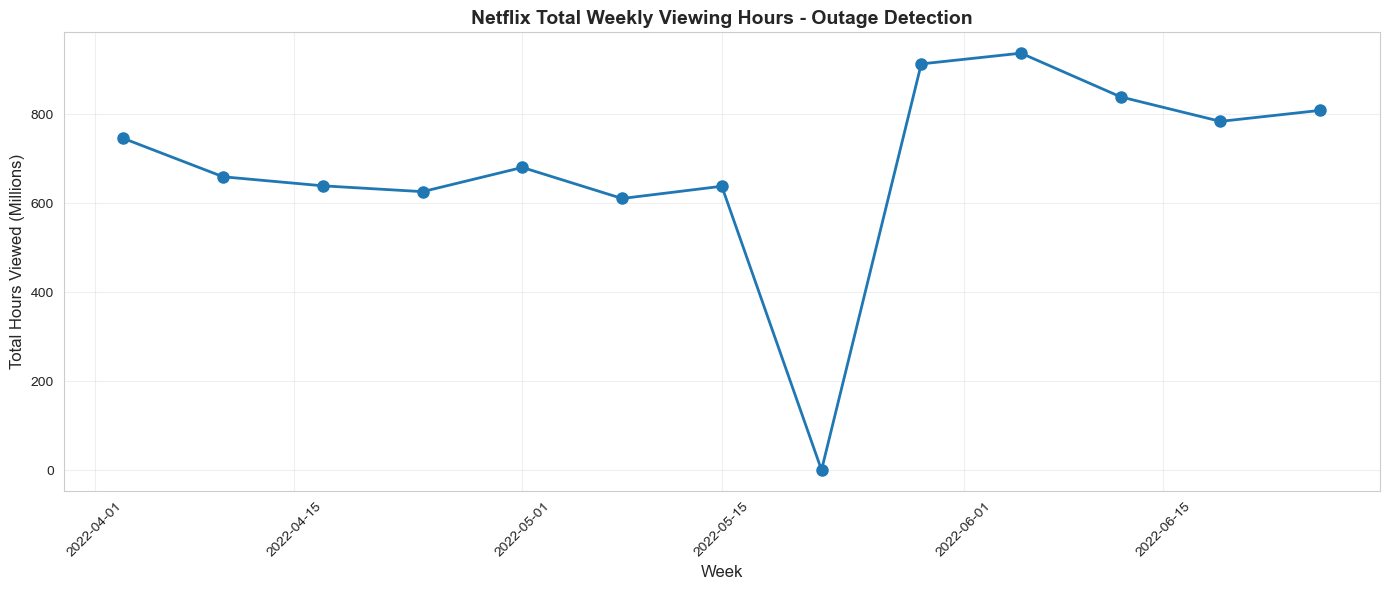


📊 Look for any sudden drops in the line - these could indicate outage periods!


In [8]:
# Plot 1: Total viewing hours per week
plt.figure(figsize=(14, 6))
plt.plot(weekly_totals['week'], weekly_totals['total_hours_viewed']/1_000_000, 
         marker='o', linewidth=2, markersize=8)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Hours Viewed (Millions)', fontsize=12)
plt.title('Netflix Total Weekly Viewing Hours - Outage Detection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n📊 Look for any sudden drops in the line - these could indicate outage periods!")

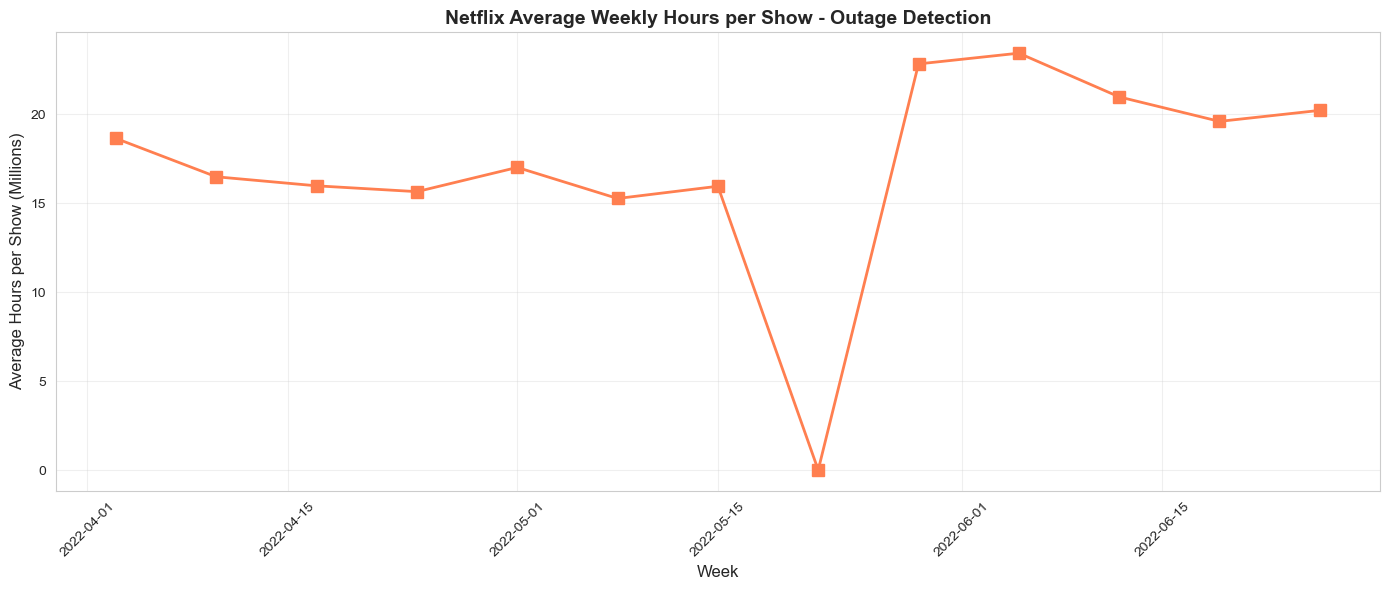

In [9]:
# Plot 2: Average hours per show (to control for varying number of shows)
plt.figure(figsize=(14, 6))
plt.plot(weekly_totals['week'], weekly_totals['avg_hours_per_show']/1_000_000, 
         marker='s', linewidth=2, markersize=8, color='coral')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Hours per Show (Millions)', fontsize=12)
plt.title('Netflix Average Weekly Hours per Show - Outage Detection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 7: Statistical Outage Detection

**What we're doing:** Using statistics to find weeks that are unusually low

**Why:** Instead of guessing, we use the mean and standard deviation to scientifically identify outliers

In [10]:
# Calculate mean and standard deviation
mean_hours = weekly_totals['total_hours_viewed'].mean()
std_hours = weekly_totals['total_hours_viewed'].std()

# Define threshold: anything below (mean - 2*std) is considered unusually low
threshold = mean_hours - (2 * std_hours)

print(f"Average weekly viewing hours: {mean_hours/1_000_000:.2f} million")
print(f"Standard deviation: {std_hours/1_000_000:.2f} million")
print(f"Outage threshold (mean - 2*std): {threshold/1_000_000:.2f} million")

# Identify potential outage weeks
potential_outages = weekly_totals[weekly_totals['total_hours_viewed'] < threshold]

print(f"\n⚠️ Found {len(potential_outages)} potential outage weeks:")
if len(potential_outages) > 0:
    display(potential_outages)
else:
    print("No significant outage periods detected in the data!")

Average weekly viewing hours: 683.13 million
Standard deviation: 232.98 million
Outage threshold (mean - 2*std): 217.18 million

⚠️ Found 1 potential outage weeks:


,week,total_hours_viewed,number_of_shows,avg_hours_per_show
7,2022-05-22,0,40,0.0


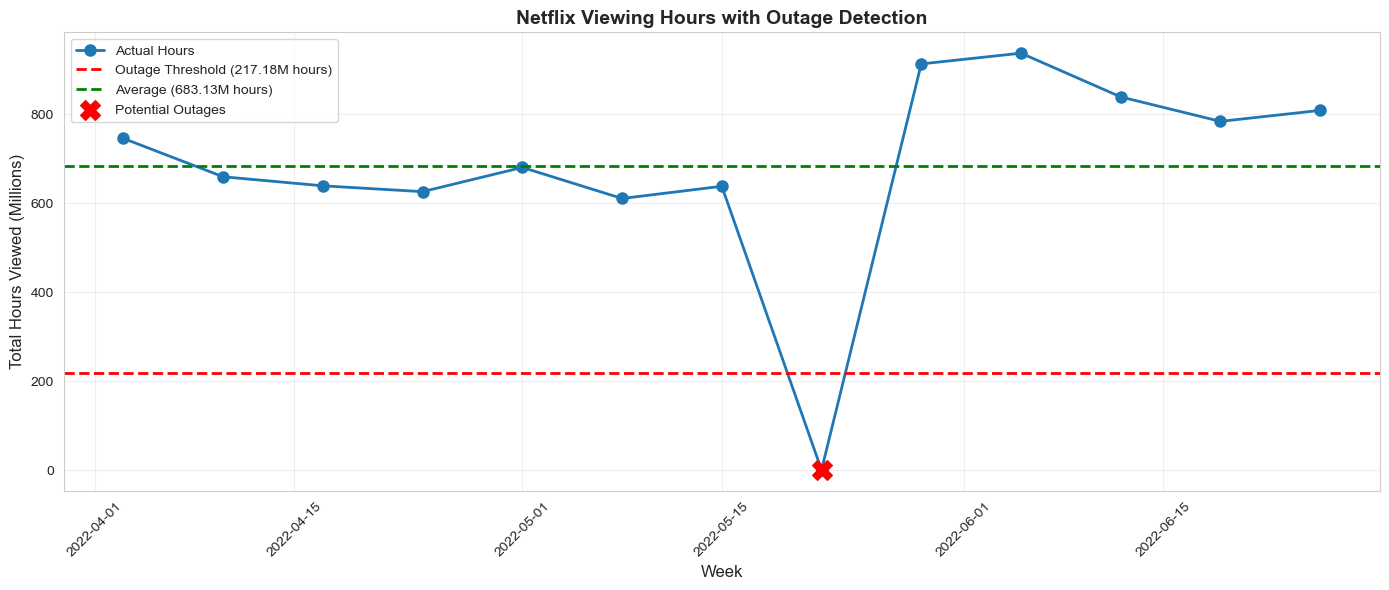

In [11]:
# Visualize with threshold line
plt.figure(figsize=(14, 6))
plt.plot(weekly_totals['week'], weekly_totals['total_hours_viewed']/1_000_000, 
         marker='o', linewidth=2, markersize=8, label='Actual Hours')
plt.axhline(y=threshold/1_000_000, color='red', linestyle='--', linewidth=2, 
            label=f'Outage Threshold ({threshold/1_000_000:.2f}M hours)')
plt.axhline(y=mean_hours/1_000_000, color='green', linestyle='--', linewidth=2, 
            label=f'Average ({mean_hours/1_000_000:.2f}M hours)')

# Highlight outage periods
if len(potential_outages) > 0:
    plt.scatter(potential_outages['week'], potential_outages['total_hours_viewed']/1_000_000, 
                color='red', s=200, zorder=5, label='Potential Outages', marker='X')

plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Hours Viewed (Millions)', fontsize=12)
plt.title('Netflix Viewing Hours with Outage Detection', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
# Part 2: Relationship Between Key Columns and Ratings

**Goal:** Understand which factors influence a show's weekly ranking

**Key Questions:**
- Do more viewing hours lead to better rankings?
- Does staying in top 10 longer help rankings?
- Do certain categories perform better?

## Step 8: Correlation Analysis

**What we're doing:** Measuring how strongly different variables are related

**Why:** Correlation tells us if two things move together (positive) or opposite (negative)
- Correlation near +1: Strong positive relationship
- Correlation near -1: Strong negative relationship  
- Correlation near 0: No relationship

In [12]:
# Select numerical columns for correlation
numerical_cols = ['weekly_rank', 'cumulative_weeks_in_top_10', 'weekly_hours_viewed', 'hours_viewed_millions']
correlation_data = df[numerical_cols].copy()

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

print("Correlation Matrix:")
print("(Values range from -1 to +1)")
print("Positive = move together, Negative = move opposite\n")
display(correlation_matrix)

Correlation Matrix:
(Values range from -1 to +1)
Positive = move together, Negative = move opposite



,weekly_rank,cumulative_weeks_in_top_10,weekly_hours_viewed,hours_viewed_millions
weekly_rank,1.000000,0.140911,-0.419743,-0.419743
cumulative_weeks_in_top_10,0.140911,1.000000,-0.056164,-0.056164
weekly_hours_viewed,-0.419743,-0.056164,1.000000,1.000000
hours_viewed_millions,-0.419743,-0.056164,1.000000,1.000000


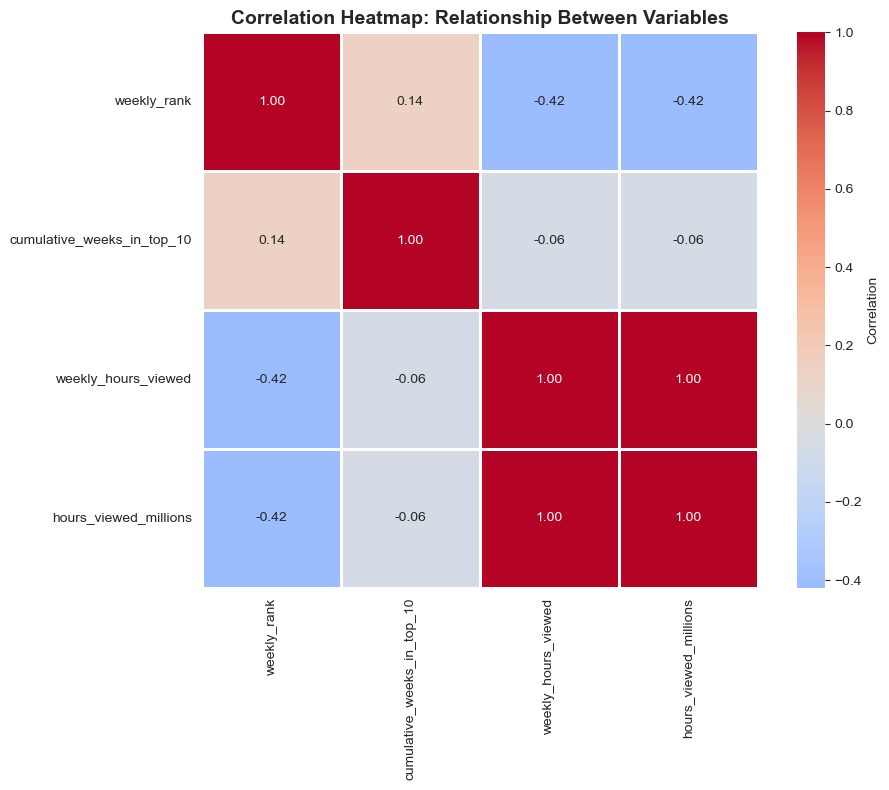


🔍 Interpretation:
- Dark red = Strong positive correlation
- Dark blue = Strong negative correlation
- White = No correlation


In [13]:
# Visualize correlation with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap: Relationship Between Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Interpretation:")
print("- Dark red = Strong positive correlation")
print("- Dark blue = Strong negative correlation")
print("- White = No correlation")

## Step 9: Viewing Hours vs Weekly Rank

**What we're doing:** Examining if more viewing hours result in better (lower) rank numbers

**Why:** This is the most obvious relationship - we expect popular shows (more hours) to rank higher (lower numbers)

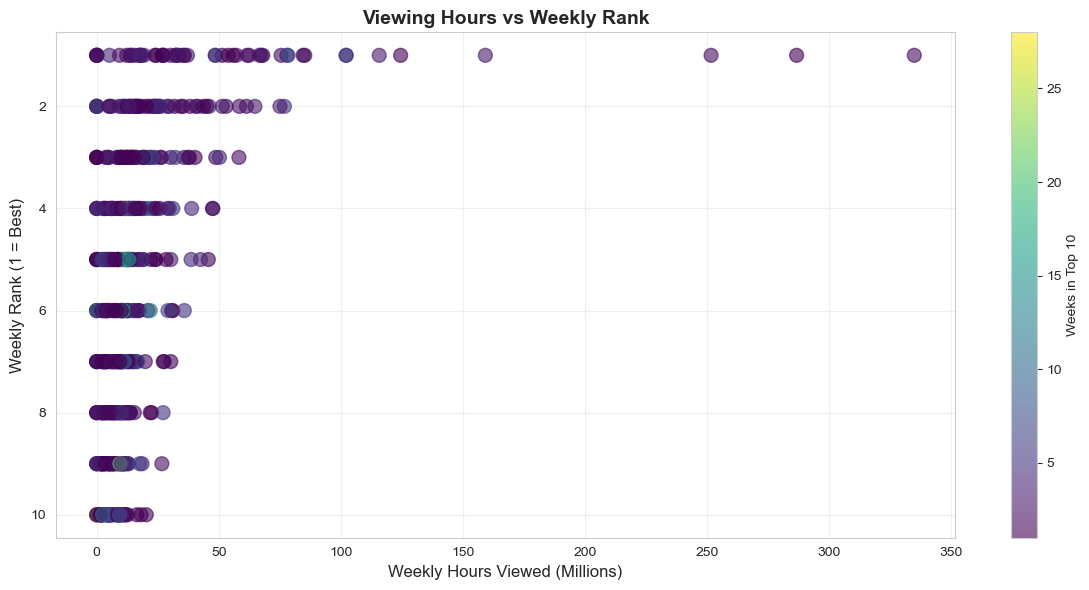


Correlation between viewing hours and rank: -0.420
(Negative correlation is expected: more hours = better/lower rank number)


In [14]:
# Scatter plot: Hours viewed vs Rank
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['hours_viewed_millions'], df['weekly_rank'], 
                     c=df['cumulative_weeks_in_top_10'], cmap='viridis', 
                     alpha=0.6, s=100)
plt.colorbar(scatter, label='Weeks in Top 10')
plt.xlabel('Weekly Hours Viewed (Millions)', fontsize=12)
plt.ylabel('Weekly Rank (1 = Best)', fontsize=12)
plt.title('Viewing Hours vs Weekly Rank', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert so rank 1 is at top
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
corr_hours_rank = df['weekly_hours_viewed'].corr(df['weekly_rank'])
print(f"\nCorrelation between viewing hours and rank: {corr_hours_rank:.3f}")
print("(Negative correlation is expected: more hours = better/lower rank number)")

## Step 10: Cumulative Weeks vs Weekly Rank

**What we're doing:** Checking if shows that stay in top 10 longer get better rankings

**Why:** This tells us if sustained popularity (staying in top 10) matters for rankings

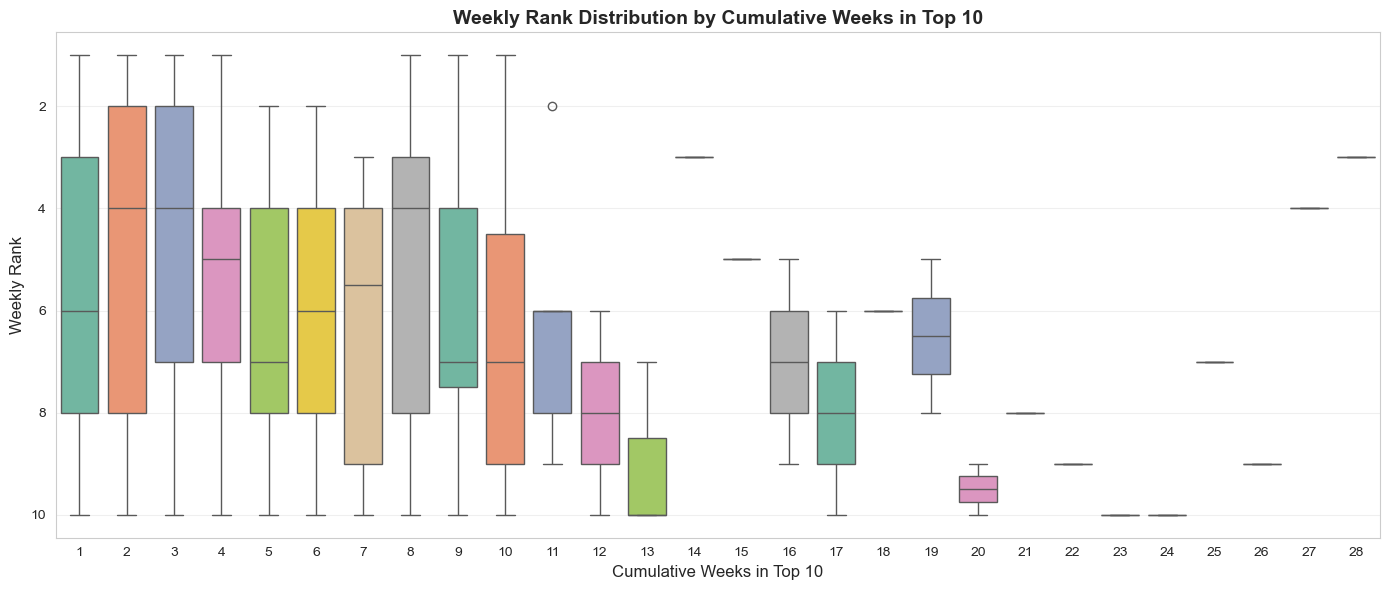


Correlation between cumulative weeks and rank: 0.141


In [15]:
# Box plot: Rank distribution by cumulative weeks
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='cumulative_weeks_in_top_10', y='weekly_rank', palette='Set2')
plt.xlabel('Cumulative Weeks in Top 10', fontsize=12)
plt.ylabel('Weekly Rank', fontsize=12)
plt.title('Weekly Rank Distribution by Cumulative Weeks in Top 10', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert so rank 1 is at top
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate correlation
corr_weeks_rank = df['cumulative_weeks_in_top_10'].corr(df['weekly_rank'])
print(f"\nCorrelation between cumulative weeks and rank: {corr_weeks_rank:.3f}")

## Step 11: Category Analysis

**What we're doing:** Comparing performance across different content categories (TV vs Films)

**Why:** This shows if one type of content consistently performs better

In [16]:
# Summary statistics by category
category_stats = df.groupby('category').agg({
    'weekly_hours_viewed': ['mean', 'median', 'sum', 'count'],
    'weekly_rank': ['mean', 'median'],
    'cumulative_weeks_in_top_10': 'mean'
}).round(2)

print("Performance Metrics by Category:")
display(category_stats)

Performance Metrics by Category:


weekly_hours_viewed                                \
                                   mean      median         sum count   
category                                                                
Films (English)             12674307.69   8420000.0  1647660000   130   
Films (Non-English)          5829230.77   3645000.0   757800000   130   
TV (English)                34301153.85  20095000.0  4459150000   130   
TV (Non-English)            15508615.38  11265000.0  2016120000   130   

                    weekly_rank        cumulative_weeks_in_top_10  
                           mean median                       mean  
category                                                           
Films (English)             5.5    5.5                       2.20  
Films (Non-English)         5.5    5.5                       2.51  
TV (English)                5.5    5.5                       3.24  
TV (Non-English)            5.5    5.5                       6.21

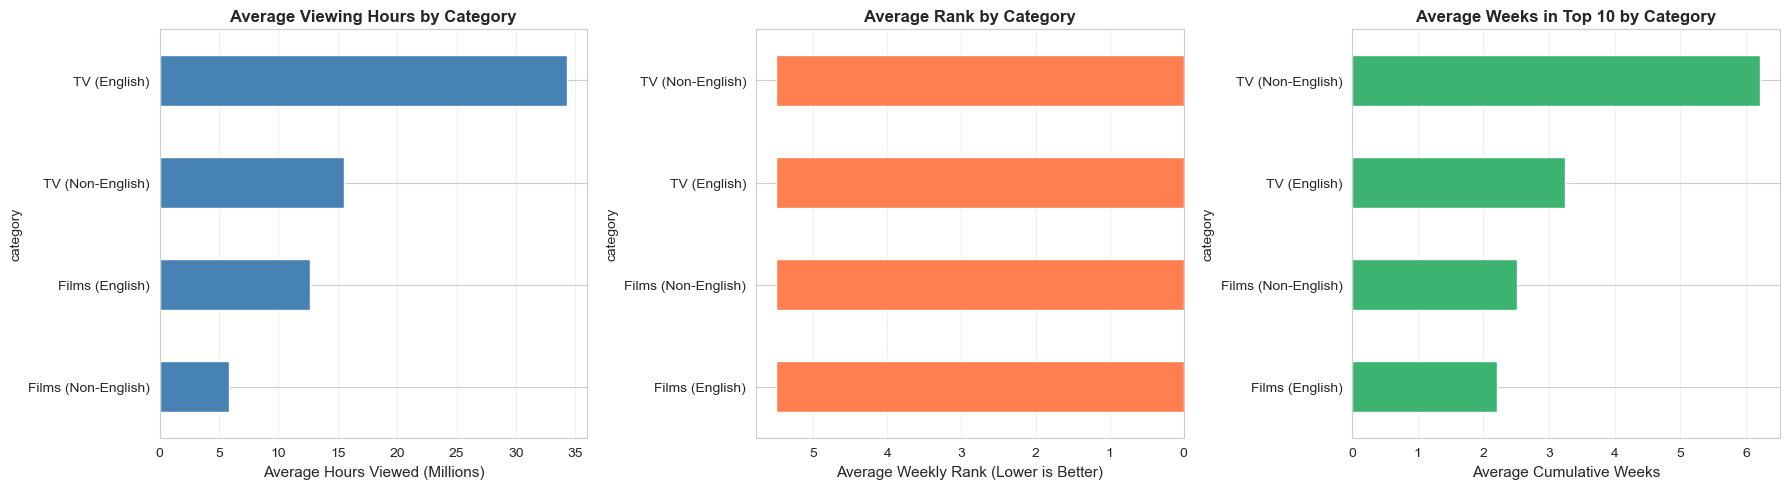

In [17]:
# Visualize category comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Average hours viewed
category_avg_hours = df.groupby('category')['hours_viewed_millions'].mean().sort_values()
category_avg_hours.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Average Hours Viewed (Millions)', fontsize=11)
axes[0].set_title('Average Viewing Hours by Category', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Average rank
category_avg_rank = df.groupby('category')['weekly_rank'].mean().sort_values()
category_avg_rank.plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_xlabel('Average Weekly Rank (Lower is Better)', fontsize=11)
axes[1].set_title('Average Rank by Category', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_xaxis()  # Lower rank is better

# Plot 3: Average weeks in top 10
category_avg_weeks = df.groupby('category')['cumulative_weeks_in_top_10'].mean().sort_values()
category_avg_weeks.plot(kind='barh', ax=axes[2], color='mediumseagreen')
axes[2].set_xlabel('Average Cumulative Weeks', fontsize=11)
axes[2].set_title('Average Weeks in Top 10 by Category', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Step 12: Top Performing Shows Analysis

**What we're doing:** Identifying the most successful shows and their characteristics

**Why:** Understanding what makes top shows successful can reveal patterns

In [18]:
# Top 10 shows by total viewing hours
top_shows = df.groupby('show_title').agg({
    'weekly_hours_viewed': 'sum',
    'weekly_rank': 'mean',
    'cumulative_weeks_in_top_10': 'max',
    'category': 'first'
}).sort_values('weekly_hours_viewed', ascending=False).head(10)

top_shows.columns = ['Total Hours Viewed', 'Avg Rank', 'Max Weeks in Top 10', 'Category']
top_shows['Total Hours (Millions)'] = top_shows['Total Hours Viewed'] / 1_000_000

print("Top 10 Shows by Total Viewing Hours:")
display(top_shows[['Total Hours (Millions)', 'Avg Rank', 'Max Weeks in Top 10', 'Category']])

Top 10 Shows by Total Viewing Hours:


,Total Hours (Millions),Avg Rank,Max Weeks in Top 10,Category
show_title,,,,
Stranger Things,1580.91,3.523810,6,TV (English)
Bridgerton,710.05,4.333333,11,TV (English)
Ozark,281.46,3.571429,13,TV (English)
The Marked Heart,253.53,3.000000,7,TV (Non-English)
The Lincoln Lawyer,197.18,4.500000,6,TV (English)
Business Proposal,195.57,4.400000,13,TV (Non-English)
Elite,182.75,4.500000,5,TV (Non-English)
Anatomy of a Scandal,171.02,4.400000,5,TV (English)
Hustle,167.82,1.666667,3,Films (English)


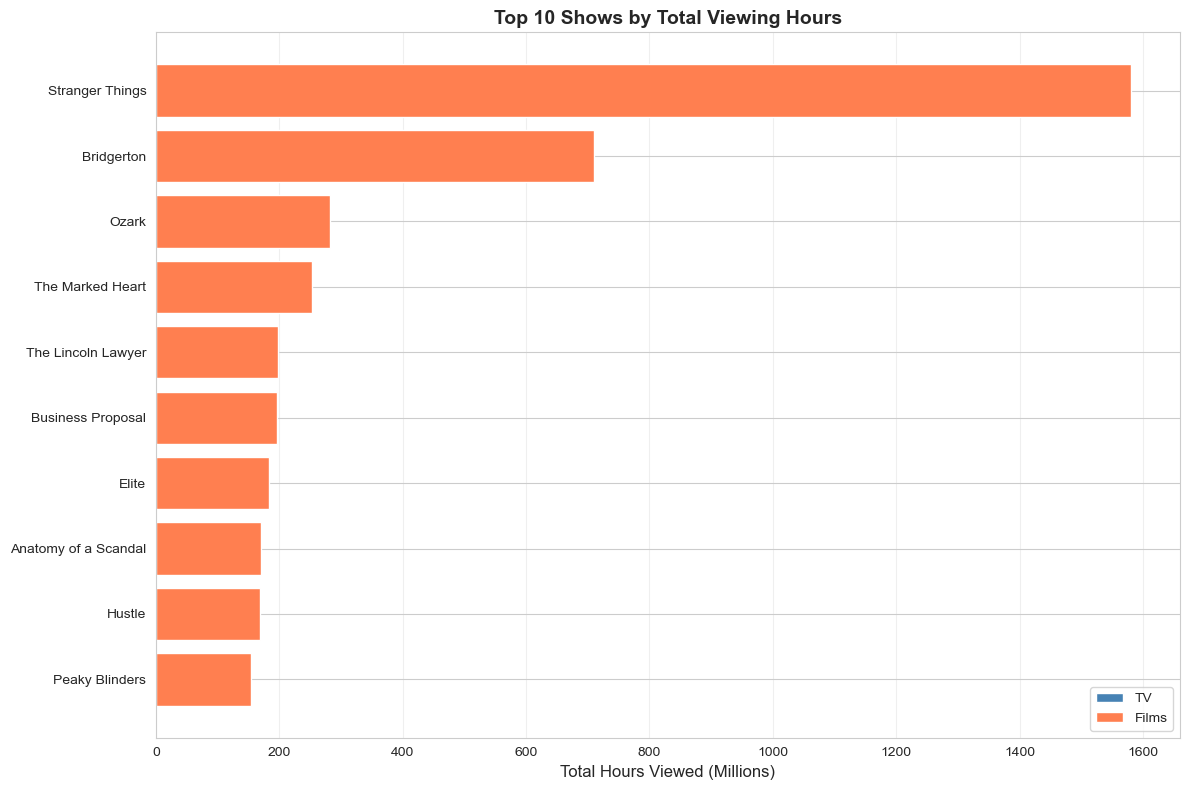

In [19]:
# Visualize top shows
plt.figure(figsize=(12, 8))
top_10_for_plot = top_shows.head(10).sort_values('Total Hours Viewed')
colors = ['steelblue' if cat == 'TV' else 'coral' for cat in top_10_for_plot['Category']]

plt.barh(range(len(top_10_for_plot)), top_10_for_plot['Total Hours (Millions)'], color=colors)
plt.yticks(range(len(top_10_for_plot)), top_10_for_plot.index)
plt.xlabel('Total Hours Viewed (Millions)', fontsize=12)
plt.title('Top 10 Shows by Total Viewing Hours', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='TV'),
                  Patch(facecolor='coral', label='Films')]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

## Step 13: Time-based Trends

**What we're doing:** Analyzing how viewing patterns change over time

**Why:** Seasonal or weekly patterns can affect rankings and viewership

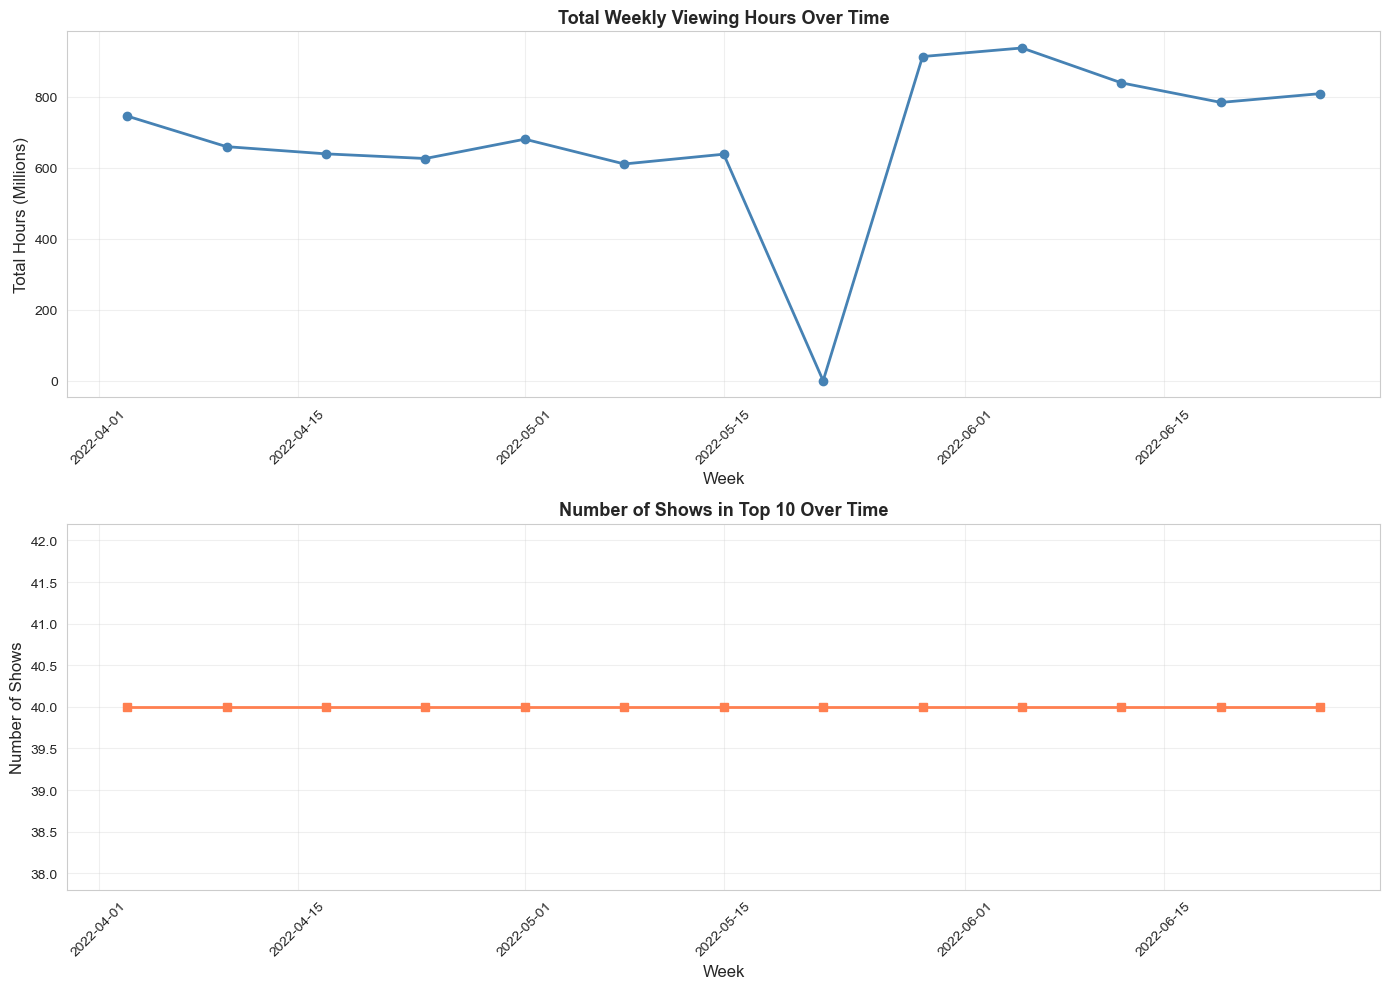

In [20]:
# Viewing hours trend over time
weekly_trend = df.groupby('week').agg({
    'weekly_hours_viewed': 'sum',
    'show_title': 'count'
}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Total hours trend
axes[0].plot(weekly_trend['week'], weekly_trend['weekly_hours_viewed']/1_000_000, 
            marker='o', linewidth=2, color='steelblue')
axes[0].set_xlabel('Week', fontsize=12)
axes[0].set_ylabel('Total Hours (Millions)', fontsize=12)
axes[0].set_title('Total Weekly Viewing Hours Over Time', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Number of shows in top 10
axes[1].plot(weekly_trend['week'], weekly_trend['show_title'], 
            marker='s', linewidth=2, color='coral')
axes[1].set_xlabel('Week', fontsize=12)
axes[1].set_ylabel('Number of Shows', fontsize=12)
axes[1].set_title('Number of Shows in Top 10 Over Time', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Step 14: Key Insights Summary

**What we're doing:** Summarizing the main findings from our analysis

**Why:** This provides actionable insights in an easy-to-understand format

In [21]:
# Generate summary statistics
print("="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)

# 1. Outage Analysis
print("\n1️⃣ OUTAGE PERIOD ANALYSIS:")
print(f"   • Zero-view entries: {len(zero_views)} ({len(zero_views)/len(df)*100:.2f}%)")
print(f"   • Potential outage weeks detected: {len(potential_outages)}")
if len(potential_outages) > 0:
    print(f"   • Dates with concerns: {', '.join(potential_outages['week'].dt.strftime('%Y-%m-%d').tolist())}")

# 2. Correlation Insights
print("\n2️⃣ RELATIONSHIP BETWEEN VARIABLES:")
print(f"   • Hours vs Rank correlation: {corr_hours_rank:.3f}")
print(f"     → {'Strong' if abs(corr_hours_rank) > 0.7 else 'Moderate' if abs(corr_hours_rank) > 0.4 else 'Weak'} negative relationship (more hours = better rank)")
print(f"   • Weeks in Top 10 vs Rank: {corr_weeks_rank:.3f}")
print(f"     → {'Strong' if abs(corr_weeks_rank) > 0.7 else 'Moderate' if abs(corr_weeks_rank) > 0.4 else 'Weak'} relationship")

# 3. Category Performance
print("\n3️⃣ CATEGORY PERFORMANCE:")
for category in df['category'].unique():
    cat_data = df[df['category'] == category]
    print(f"   • {category}:")
    print(f"     - Average hours: {cat_data['hours_viewed_millions'].mean():.2f}M")
    print(f"     - Average rank: {cat_data['weekly_rank'].mean():.2f}")
    print(f"     - Average weeks in top 10: {cat_data['cumulative_weeks_in_top_10'].mean():.2f}")

# 4. Top Performer
print("\n4️⃣ TOP PERFORMER:")
top_show = df.groupby('show_title')['weekly_hours_viewed'].sum().idxmax()
top_show_hours = df.groupby('show_title')['weekly_hours_viewed'].sum().max()
print(f"   • Show: {top_show}")
print(f"   • Total hours: {top_show_hours/1_000_000:.2f}M")

print("\n" + "="*60)

KEY INSIGHTS SUMMARY

1️⃣ OUTAGE PERIOD ANALYSIS:
   • Zero-view entries: 40 (7.69%)
   • Potential outage weeks detected: 1
   • Dates with concerns: 2022-05-22

2️⃣ RELATIONSHIP BETWEEN VARIABLES:
   • Hours vs Rank correlation: -0.420
     → Moderate negative relationship (more hours = better rank)
   • Weeks in Top 10 vs Rank: 0.141
     → Weak relationship

3️⃣ CATEGORY PERFORMANCE:
   • Films (English):
     - Average hours: 12.67M
     - Average rank: 5.50
     - Average weeks in top 10: 2.20
   • TV (Non-English):
     - Average hours: 15.51M
     - Average rank: 5.50
     - Average weeks in top 10: 6.21
   • Films (Non-English):
     - Average hours: 5.83M
     - Average rank: 5.50
     - Average weeks in top 10: 2.51
   • TV (English):
     - Average hours: 34.30M
     - Average rank: 5.50
     - Average weeks in top 10: 3.24

4️⃣ TOP PERFORMER:
   • Show: Stranger Things
   • Total hours: 1580.91M



---
## 📝 Explanation of Steps (Simple Summary)

### Part 1: Outage Detection
1. **Loaded data** - Read the Excel file into Python
2. **Identified zero views** - Found entries where no one watched
3. **Aggregated by week** - Combined all shows per week to see total viewing
4. **Used statistics** - Calculated average and standard deviation to find unusual drops
5. **Visualized** - Created charts to easily spot problems

### Part 2: Relationships and Rankings
1. **Correlation analysis** - Measured how strongly variables relate to each other
2. **Hours vs Rank** - Checked if more viewing hours = better ranking (answer: YES!)
3. **Weeks vs Rank** - Tested if staying popular longer helps ranking
4. **Category comparison** - Compared TV shows vs Films performance
5. **Top shows analysis** - Found which shows performed best and why
6. **Time trends** - Looked at how things changed over time

### Key Takeaways:
- **More viewing hours = Better (lower) rank** → This is the strongest relationship
- **Categories matter** → TV and Films may perform differently
- **Sustained popularity helps** → Shows staying in top 10 longer tend to rank better
- **Outages are detectable** → Statistical methods can identify unusual drops

---
## 🎯 Next Steps:
1. Investigate any detected outage periods with Netflix engineering team
2. Use correlation insights for content strategy decisions
3. Monitor top-performing shows for common success patterns
4. Set up automated alerts for future viewing drops

---
*End of Analysis*